In [2]:
import pandas as pd
import json

# Load the JSON event data, inserting relevant file path
with open('/Users/Trymso/Desktop/J-League/sb_events.json') as f:
    e_data = json.load(f)

# Load the JSON match data, inserting relevant file path
with open('/Users/Trymso/Desktop/J-League/sb_matches.json') as f:
    m_data = json.load(f)

# Convert the JSON data to a DataFrame
events_df = pd.json_normalize(e_data)
matches_df = pd.json_normalize(m_data)

In [3]:
events_df.columns = events_df.columns.str.replace(".name", "", regex=True)
events_df.columns = events_df.columns.str.replace("[.]", "_", regex=True)

matches_df.columns = matches_df.columns.str.replace(".name", "", regex=True)
matches_df.columns = matches_df.columns.str.replace("[.]", "_", regex=True)

In [6]:
list(events_df.columns)

['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'possession',
 'duration',
 'related_events',
 'location',
 'type_id',
 'type',
 'possession_team_id',
 'possession_team',
 'play_pattern_id',
 'play_pattern',
 'team_id',
 'team',
 'tactics_formation',
 'tactics_lineup',
 'pass_end_location',
 'carry_end_location',
 'shot_end_location',
 'shot_freeze_frame',
 'goalkeeper_end_location',
 'match_id',
 'obv_for_after',
 'obv_for_before',
 'obv_for_net',
 'obv_against_after',
 'obv_against_before',
 'obv_against_net',
 'obv_total_net',
 'player_id',
 'player',
 'position_id',
 'position',
 'pass_length',
 'pass_angle',
 'pass_pass_success_probability',
 'pass_recipient_id',
 'pass_recipient',
 'pass_height_id',
 'pass_height',
 'pass_body_part_id',
 'pass_body_part',
 'pass_type_id',
 'pass_type',
 'pass_pass_cluster_id',
 'pass_pass_cluster_label',
 'pass_pass_cluster_probability',
 'under_pressure',
 'pass_aerial_won',
 'pass_outcome_id',
 'pass_outcome',
 'duel_type_id',


In [8]:
# Filter rows for the player
player_events = events_df[events_df['player'] == 'Ryotaro Araki']

In [10]:
# Safely split the 'location' column into 'x' and 'y' coordinates
player_events[['x', 'y']] = player_events['location'].apply(
    lambda loc: pd.Series(loc) if isinstance(loc, list) and len(loc) == 2 else pd.Series([None, None])
)

player_events[['pass_end_x', 'pass_end_y']] = player_events['pass_end_location'].apply(
    lambda loc: pd.Series(loc) if isinstance(loc, list) and len(loc) == 2 else pd.Series([None, None])
)

player_events[['carry_end_x', 'carry_end_y']] = player_events['carry_end_location'].apply(
    lambda loc: pd.Series(loc) if isinstance(loc, list) and len(loc) == 2 else pd.Series([None, None])
)

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_26401/2598011720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_events[['x', 'y']] = player_events['location'].apply(
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_26401/2598011720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_events[['x', 'y']] = player_events['location'].apply(
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_26401/2598011720.py:6: SettingWithCopyWarning: 
A value is trying to be set

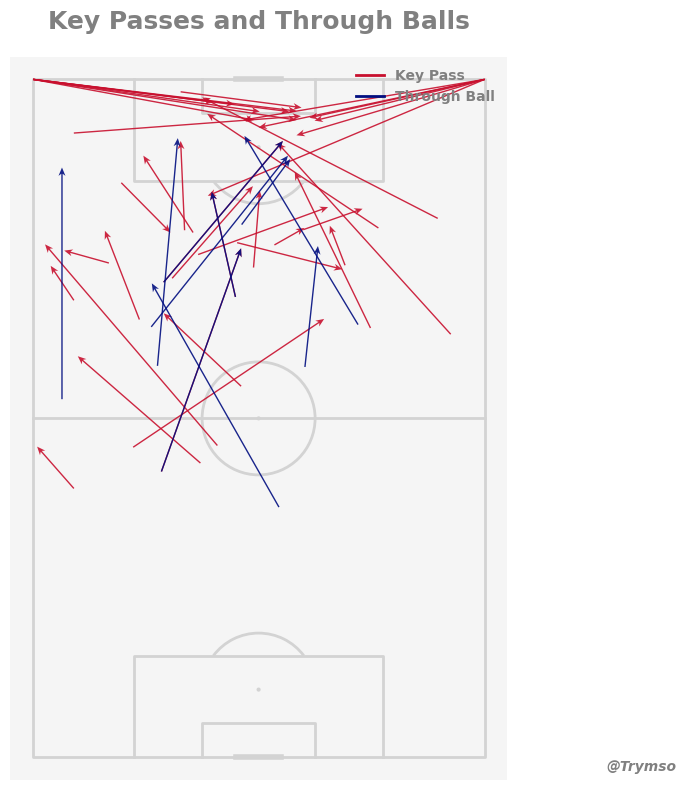

In [14]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

# Create the pitch with similar design
pitch = VerticalPitch(
    pitch_type='statsbomb', 
    pitch_color='#f5f5f5', 
    line_color='#d3d3d3', 
    line_zorder=1, 
)
fig, ax = pitch.draw(figsize=(12, 8))

# Filter the dataframe for key passes and through balls
key_passes = player_events[
    (player_events['type'] == 'Pass') & 
    (player_events['pass_shot_assist'] == True)
]
through_balls = player_events[
    (player_events['type'] == 'Pass') & 
    (player_events['pass_through_ball'] == True)
]

# Plot Key Passes
for _, row in key_passes.iterrows():
    pitch.arrows(
        xstart=row['x'], ystart=row['y'], 
        xend=row['pass_end_x'], yend=row['pass_end_y'], 
        ax=ax, color='#c8102E', width=1, headwidth=5, headlength=6, lw=2, 
        alpha=0.9, zorder=2, label='Key Pass' if 'Key Pass' not in ax.get_legend_handles_labels()[1] else ''
    )

# Plot Through Balls
for _, row in through_balls.iterrows():
    pitch.arrows(
        xstart=row['x'], ystart=row['y'], 
        xend=row['pass_end_x'], yend=row['pass_end_y'], 
        ax=ax, color='#010E80', width=1, headwidth=5, headlength=6, lw=2, 
        alpha=0.9, linestyle='-', zorder=3, label='Through Ball' if 'Through Ball' not in ax.get_legend_handles_labels()[1] else ''
    )

# Add a legend
legend_elements = [
    plt.Line2D([0], [0], color='#c8102E', lw=2, label='Key Pass'),
    plt.Line2D([0], [0], color='#010E80', lw=2, label='Through Ball'),
]
legend = ax.legend(handles=legend_elements, loc='upper right', fontsize=10, frameon=False)

# Change the text color in the legend to grey
for text in legend.get_texts():
    text.set_color('grey')
    text.set_fontweight('bold')
    text.set_fontfamily('DejaVu Sans')

# Add a title
ax.set_title(
    "Key Passes and Through Balls",
    fontsize=18, 
    fontweight='bold', 
    fontfamily='DejaVu Sans', 
    color='grey', 
    pad=20
)

# Add Twitter handle
fig.text(
    0.79, 
    0.03, 
    '@Trymso', 
    fontsize=10, 
    fontstyle='italic',
    fontweight='bold',
    fontfamily='DejaVu Sans', 
    color='gray'
)

# Show the plot
plt.show()


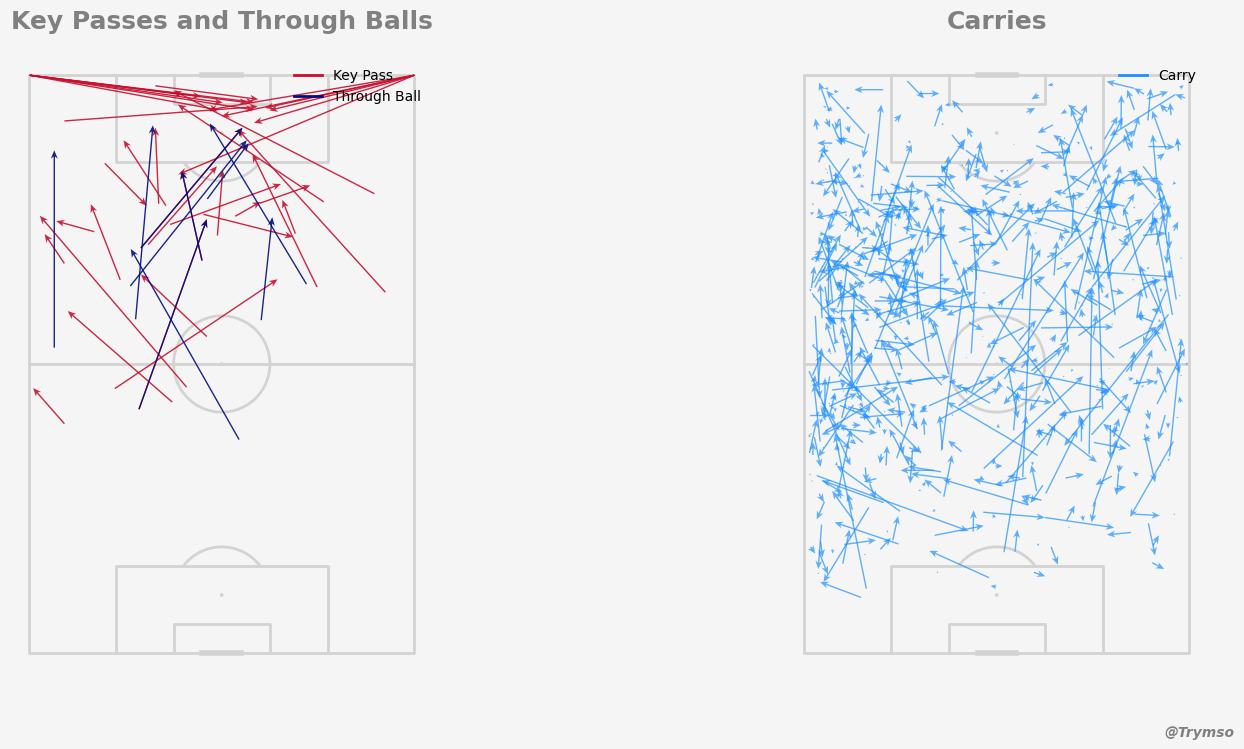

In [60]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

# Create the pitch with similar design
pitch = VerticalPitch(
    pitch_type='statsbomb', 
    pitch_color='#f5f5f5', 
    line_color='#d3d3d3', 
    line_zorder=1
)

# Set up a grid layout for two pitches with reduced spacing
fig, axs = plt.subplots(1, 2, figsize=(20, 8),gridspec_kw={'wspace': 0.000000001})
fig.set_facecolor('#f5f5f5')

# === PITCH 1: Key Passes and Through Balls === #
# Filter the dataframe for key passes and through balls
key_passes = player_events[
    (player_events['type'] == 'Pass') & 
    (player_events['pass_shot_assist'] == True)
]
through_balls = player_events[
    (player_events['type'] == 'Pass') & 
    (player_events['pass_through_ball'] == True)
]

# Draw the first pitch
pitch.draw(ax=axs[0])

# Plot Key Passes
for _, row in key_passes.iterrows():
    pitch.arrows(
        xstart=row['x'], ystart=row['y'], 
        xend=row['pass_end_x'], yend=row['pass_end_y'], 
        ax=axs[0], color='#c8102E', width=1, headwidth=5, headlength=6, lw=2, 
        alpha=0.9, zorder=2
    )

# Plot Through Balls
for _, row in through_balls.iterrows():
    pitch.arrows(
        xstart=row['x'], ystart=row['y'], 
        xend=row['pass_end_x'], yend=row['pass_end_y'], 
        ax=axs[0], color='#010E80', width=1, headwidth=5, headlength=6, lw=2, 
        alpha=0.9, linestyle='-', zorder=3
    )

# Add a title to the first pitch
axs[0].set_title(
    "Key Passes and Through Balls",
    fontsize=18, 
    fontweight='bold', 
    fontfamily='DejaVu Sans', 
    color='grey', 
    pad=20
)

# === PITCH 2: Carries === #
# Filter the dataframe for carries
carries = player_events[
    (player_events['type'] == 'Carry') & 
    (player_events['x'].notna()) & 
    (player_events['y'].notna()) & 
    (player_events['carry_end_x'].notna()) & 
    (player_events['carry_end_y'].notna())
]

# Draw the second pitch
pitch.draw(ax=axs[1])

# Plot Carries
for _, row in carries.iterrows():
    pitch.arrows(
        xstart=row['x'], ystart=row['y'], 
        xend=row['carry_end_x'], yend=row['carry_end_y'], 
        ax=axs[1], color='#1E90FF', width=1, headwidth=5, headlength=6, lw=2, 
        alpha=0.7, zorder=2
    )

# Add a title to the second pitch
axs[1].set_title(
    "Carries",
    fontsize=18, 
    fontweight='bold', 
    fontfamily='DejaVu Sans', 
    color='grey', 
    pad=20
)

# Add legends to both pitches
legend_elements_1 = [
    plt.Line2D([0], [0], color='#c8102E', lw=2, label='Key Pass'),
    plt.Line2D([0], [0], color='#010E80', lw=2, label='Through Ball'),
]
axs[0].legend(handles=legend_elements_1, loc='upper right', fontsize=10, frameon=False)

legend_elements_2 = [
    plt.Line2D([0], [0], color='#1E90FF', lw=2, label='Carry'),
]
axs[1].legend(handles=legend_elements_2, loc='upper right', fontsize=10, frameon=False)

# Add Twitter handle
fig.text(
    0.79, 
    0.03, 
    '@Trymso', 
    fontsize=10, 
    fontstyle='italic',
    fontweight='bold',
    fontfamily='DejaVu Sans', 
    color='gray'
)

# Show the plot
plt.show()


In [20]:
player_events.shot_outcome.unique()

array([nan, 'Blocked', 'Off T', 'Post', 'Saved', 'Wayward', 'Goal'],
      dtype=object)

In [22]:
player_events.type.unique()

array(['Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Block', '50/50',
       'Ball Recovery', 'Shot', 'Dribbled Past', 'Foul Committed', 'Duel',
       'Dispossessed', 'Foul Won', 'Clearance', 'Substitution',
       'Miscontrol', 'Dribble', 'Injury Stoppage', 'Interception',
       'Player Off', 'Player On'], dtype=object)

In [24]:
print(goals[['x', 'y']].head())
print(goals.shape)

print(shots[['x', 'y', 'shot_statsbomb_xg']].head())
print(shots.shape)


          x   y
291548  NaN NaN
358308  NaN NaN
517662  NaN NaN
1118464 NaN NaN
1208988 NaN NaN
(7, 168)
        x   y  shot_statsbomb_xg
10392 NaN NaN             0.0368
11633 NaN NaN             0.0390
54111 NaN NaN             0.0372
55090 NaN NaN             0.3393
81294 NaN NaN             0.0291
(43, 168)


In [34]:
player_events.shot_end_location

10098      None
10139      None
10140      None
10143      None
10144      None
           ... 
1236909    None
1236910    None
1236913    None
1236914    None
1236916    None
Name: shot_end_location, Length: 3427, dtype: object

In [40]:
print(goals[['x', 'y']].head(10))

          x   y
291548  NaN NaN
358308  NaN NaN
517662  NaN NaN
1118464 NaN NaN
1208988 NaN NaN
1234979 NaN NaN
1236344 NaN NaN


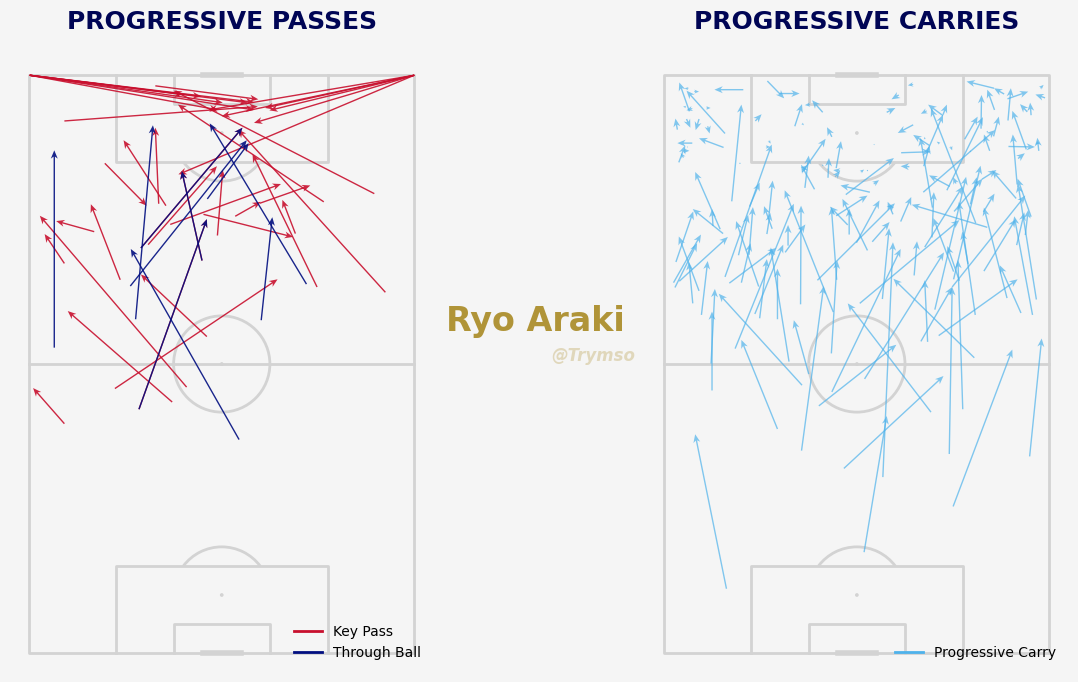

In [144]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

# Create the pitch with similar design
pitch = VerticalPitch(
    pitch_type='statsbomb', 
    pitch_color='#f5f5f5', 
    line_color='#d3d3d3', 
    line_zorder=1
)

# Set up a grid layout for two pitches with reduced width and minimal spacing
fig, axs = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'wspace': 0.05})  # Adjusted width and wspace
fig.set_facecolor('#f5f5f5')

# === PITCH 1: Key Passes and Through Balls === #
# Filter the dataframe for key passes and through balls
key_passes = player_events[
    (player_events['type'] == 'Pass') & 
    (player_events['pass_shot_assist'] == True)
]
through_balls = player_events[
    (player_events['type'] == 'Pass') & 
    (player_events['pass_through_ball'] == True)
]

# Draw the first pitch
pitch.draw(ax=axs[0])

# Plot Key Passes
for _, row in key_passes.iterrows():
    pitch.arrows(
        xstart=row['x'], ystart=row['y'], 
        xend=row['pass_end_x'], yend=row['pass_end_y'], 
        ax=axs[0], color='#c8102E', width=1, headwidth=5, headlength=6, lw=2, 
        alpha=0.9, zorder=2
    )

# Plot Through Balls
for _, row in through_balls.iterrows():
    pitch.arrows(
        xstart=row['x'], ystart=row['y'], 
        xend=row['pass_end_x'], yend=row['pass_end_y'], 
        ax=axs[0], color='#010E80', width=1, headwidth=5, headlength=6, lw=2, 
        alpha=0.9, linestyle='-', zorder=3
    )

# Add a title to the first pitch
axs[0].set_title(
    "PROGRESSIVE PASSES",
    fontsize=18, 
    fontweight='bold', 
    fontfamily='DejaVu Sans', 
    color='#000555', 
    pad=20
)

# === PITCH 2: Progressive Carries === #
# Filter the dataframe for progressive carries
progressive_carries = player_events[
    (player_events['type'] == 'Carry') & 
    (player_events['x'].notna()) & 
    (player_events['y'].notna()) & 
    (player_events['carry_end_x'].notna()) & 
    (player_events['carry_end_y'].notna()) &
    ((player_events['carry_end_x'] - player_events['x']) >= 0.25 * (100 - player_events['x']))  # Progressive condition
]

# Draw the second pitch
pitch.draw(ax=axs[1])

# Plot Progressive Carries
for _, row in progressive_carries.iterrows():
    pitch.arrows(
        xstart=row['x'], ystart=row['y'], 
        xend=row['carry_end_x'], yend=row['carry_end_y'], 
        ax=axs[1], color='#4EB2EB', width=1, headwidth=5, headlength=6, lw=2, 
        alpha=0.7, zorder=2
    )

# Add a title to the second pitch
axs[1].set_title(
    "PROGRESSIVE CARRIES",
    fontsize=18, 
    fontweight='bold',
    fontfamily='DejaVu Sans', 
    color='#000555', 
    pad=20
)

# Add legends to both pitches
legend_elements_1 = [
    plt.Line2D([0], [0], color='#c8102E', lw=2, label='Key Pass'),
    plt.Line2D([0], [0], color='#010E80', lw=2, label='Through Ball'),
]
axs[0].legend(handles=legend_elements_1, loc='lower right', fontsize=10, frameon=False)

legend_elements_2 = [
    plt.Line2D([0], [0], color='#4EB2EB', lw=2, label='Progressive Carry'),
]
axs[1].legend(handles=legend_elements_2, loc='lower right', fontsize=10, frameon=False)

# Add a centered title
fig.suptitle(
    "Ryo Araki", 
    fontsize=24, 
    fontweight='bold', 
    fontfamily='DejaVu Sans', 
    color='#B09438',  # Gold color
    x=0.51, 
    y=0.57  # Adjust the vertical position
)

# Add Twitter handle
fig.text(
    0.52, 
    0.50, 
    '@Trymso', 
    fontsize=12, 
    fontstyle='italic',
    fontweight='bold',
    fontfamily='DejaVu Sans', 
    color='#B09438',
    alpha=.3
)

# Show the plot
plt.show()


In [146]:
fig.savefig('/Users/Trymso/Desktop/araki_actions.png', dpi=300, bbox_inches='tight')